In [1]:
import numpy as np
import pandas as pd

In [9]:
# create pandas dataframe object
df = pd.read_csv('./UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv',sep='\t')

In [6]:
# show first 5 rows
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
# check number of rows in dataframe
len(df)

5572

In [16]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [18]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Visualize histogram of data

This histogram examines the length feature and shows that the distribution 
of 'spam' messages vs 'ham'messages is quite different. 'Spam' messages tend 
to be longer in length than 'ham' messages, which means the length feature 
may have predictive power when trying to differentiate between the two classes.

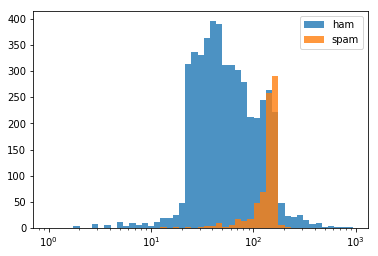

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

This histogram of the data shows that there is not a great difference in distribution
when it comes to the punctuation feature. This feature does not appear to have as much
predictive power when it comes to predicting whether a message is 'spam' or 'ham'
compared to the length feature. However, we can still experiment with this feature in
our ML model.

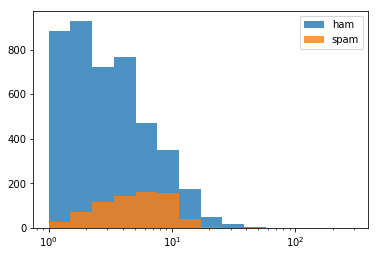

In [20]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# Build ML model
This ML model will be trained to distinguish 'spam' messages from 'ham' messages
based on two features: length and punctuation counts. 

# Scikit-learn Primer

**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

In [23]:
from sklearn.model_selection import train_test_split

# X feature data
X = df[['length','punct']]

# y is our label
y = df['label']

# train_test_split(X features, y labels, size of test data, optional random seed that lets
# you split the data the same way each time. Integer value is arbitrary, all that matters
# is that you use the same number if you want the data split the same way each time.) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
# (number of rows, number of columns)
X_train.shape

(3900, 2)

In [26]:
# (number of rows, number of columns)

X_test.shape

(1672, 2)

In [27]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
2973     ham
2991     ham
2942     ham
230      ham
1181     ham
1912     ham
1992     ham
5435     ham
4805     ham
401     spam
1859     ham
1344     ham
2952     ham
501      ham
3337     ham
1945     ham
3142     ham
2422     ham
381      ham
5567    spam
4937     ham
79       ham
5240     ham
2554     ham
5345     ham
        ... 
1170     ham
1391     ham
4337     ham
220      ham
1662     ham
627      ham
3545     ham
2809     ham
83       ham
3102     ham
790      ham
2476     ham
461      ham
4907     ham
551      ham
3375     ham
4020    spam
3516     ham
198      ham
3193     ham
2857     ham
402      ham
3782     ham
4456     ham
5308     ham
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [28]:
X_train

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3
2275,89,2
1424,32,1
1216,83,4
5211,31,1
4743,37,3


In [29]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
2973,65,2
2991,126,7
2942,95,3
230,34,0
1181,26,3


## Train Logistic Regression model

In [30]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression(solver='lbfgs')

In [34]:
lr_model.fit(X_train,y_train)

C:\Users\pwalsh\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Test Logistic Regression model

In [36]:
from sklearn import metrics

In [37]:
predictions = lr_model.predict(X_test)

In [38]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [42]:
# print out a basic confusion matrix
# columns = ACTUAL
# rows = PREDICTIONS
metrics.confusion_matrix(y_test,predictions)

array([[1404,   44],
       [ 219,    5]], dtype=int64)

In [43]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


### View model performance metrics

In [45]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [46]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


## Train and test Naïve Bayes model

In [48]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [49]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [50]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


## Train and test Support Vector Machine (SVM) model

In [53]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [54]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [55]:
print(metrics.accuracy_score(y_test,predictions))

0.8827751196172249
